In [1]:
import time
from copy import deepcopy

import IPython.display as IPd
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np

import stg_energy.fig2_histograms.viz as viz
from pyloric.sbi_wrapper import get_time, simulate_energyscape
from stg_energy.common import col, svg
from stg_energy.fig2_histograms.energy import select_ss_close_to_obs

# Figure 2

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
PANEL_STG = "svg/panel_stg.svg"
PANEL_A = "svg/panel_a.svg"
PANEL_B = "svg/panel_b.svg"
PANEL_C1 = "svg/panel_c1.svg"
PANEL_C2 = "svg/panel_c2.svg"
PANEL_D1 = "svg/panel_d1.svg"
PANEL_D2 = "svg/panel_d2.svg"

PANEL_C1_supp = "svg/panel_c1_supp.svg"
PANEL_C2_supp = "svg/panel_c2_supp.svg"
PANEL_D1_supp = "svg/panel_d1_supp.svg"
PANEL_D2_supp = "svg/panel_d2_supp.svg"

In [4]:
outfile = "../../results/11deg_post_pred/11_deg_post_pred.npz"
data_n = np.load(outfile)
sample_seeds = data_n["seeds"]
sample_params = data_n["params"]
sample_stats = data_n["stats"]
print("There are", len(sample_seeds), "datapoints in this dataset")

There are 1124507 datapoints in this dataset


### Load prior simulations for getting the std and mean of summstats

In [5]:
datafile = "../../results/prior_samples_after_classifier/samples_full_3.npz"
data = np.load(datafile)

params = data["params"]
stats = data["stats"]
seeds = data["seeds"]

stats_mean = np.mean(stats, axis=0)
stats_std = np.std(stats, axis=0)

### Load experimental data

In [6]:
npz = np.load("../../results/experimental_data/summstats_prep845_082_0044.npz")
observation = npz["summ_stats"]

npz = np.load("../../results/experimental_data/trace_data_845_082_0044.npz")
t = npz["t"]

### Select only the ones that are close to the observation

In [7]:
num_std = np.asarray(
    [0.02, 0.02, 0.02, 0.02, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
)

In [8]:
good_params, good_dat, good_seeds = select_ss_close_to_obs(
    sample_params,
    sample_stats,
    sample_seeds,
    observation,
    num_std=num_std,
    stats_std=stats_std[:15],
)

In [9]:
sample_stats = good_dat
sample_params = good_params
sample_seeds = good_seeds

# Panel A: Histogram for total energy

In [10]:
all_energies_per_spike = sample_stats[:, 18:21]
all_total_energies = sample_stats[:, 21:24]

In [11]:
summed_energies_per_spike = np.sum(np.asarray(all_energies_per_spike), axis=1)
summed_energies_total = np.sum(np.asarray(all_total_energies), axis=1)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


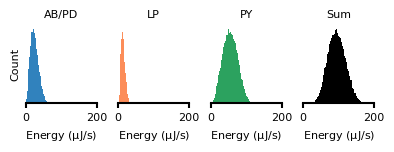

In [12]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 4, figsize=(4.5, 1))

    # The factor /4000 comes from: 0.025ms stepsize -> total energy = int_energy = energy * 0.025ms = energy / 40000
    # But then, we have x1000 because all our currents are given in /cm**2. Thus, we have to multiply with 10,000 to obtain nano-Joule.
    # We say that our units are in micro-Joule, hence divide by 1000.
    # Lastly, divide by 10 because 10 second recording
    # This gives us: /40000 * 10000 / 1000 / 10 = /40000
    _ = ax[0].hist(
        all_total_energies[:, 0] / 40000, range=[0, 200], bins=100, color="#3182bd"
    )
    ax[0].set_ylabel("Count")
    ax[0].tick_params(axis="both", which="major")
    ax[0].spines["top"].set_visible(False)
    ax[0].spines["right"].set_visible(False)
    ax[0].spines["left"].set_visible(False)
    ax[0].axes.get_yaxis().set_ticks([])
    ax[0].set_title("AB/PD")

    _ = ax[1].hist(
        all_total_energies[:, 1] / 40000, range=[0, 200], bins=100, color="#fc8d59"
    )
    # ax[1].set_ylabel('Count')
    ax[1].tick_params(axis="both", which="major")
    ax[1].spines["top"].set_visible(False)
    ax[1].spines["right"].set_visible(False)
    ax[1].spines["left"].set_visible(False)
    ax[1].axes.get_yaxis().set_ticks([])
    ax[1].set_title("LP")

    _ = ax[2].hist(
        all_total_energies[:, 2] / 40000, range=[0, 200], bins=100, color="#2ca25f"
    )
    # ax[2].set_ylabel('Count')
    ax[2].tick_params(axis="both", which="major")
    ax[2].spines["top"].set_visible(False)
    ax[2].spines["right"].set_visible(False)
    ax[2].spines["left"].set_visible(False)
    ax[2].axes.get_yaxis().set_ticks([])
    ax[2].set_title("PY")

    _ = ax[3].hist(summed_energies_total / 40000, range=[0, 200], bins=100, color="k")
    # ax[3].set_ylabel('Count')
    ax[3].tick_params(axis="both", which="major")
    ax[3].spines["top"].set_visible(False)
    ax[3].spines["right"].set_visible(False)
    ax[3].spines["left"].set_visible(False)
    ax[3].axes.get_yaxis().set_ticks([])
    ax[3].set_title("Sum")

    plt.subplots_adjust(wspace=0.3)
    
    for i in range(4):
        ax[i].set_xlim([0, 200])
        ax[i].spines["top"].set_visible(False)
        ax[i].spines["right"].set_visible(False)
        ax[i].spines["left"].set_visible(False)
        ax[i].set_xlabel("Energy ($\mu$J/s)")
        ax[i].set_xticks([0, 200])

    plt.savefig(PANEL_A, facecolor="None", transparent=True)
    plt.show()

# Panel B: Histogram for energy per spike

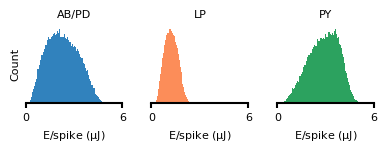

In [13]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 3, figsize=(4.5, 1))

    # The factor /4000 comes from: 10 second recording. 0.025ms stepsize -> total energy = int_energy = energy * 0.025ms = energy / 40000
    _ = ax[0].hist(all_energies_per_spike[:, 0]/40000*10, range=[0, 6], bins=100, color="#3182bd")
    ax[0].set_ylabel("Count")
    ax[0].axes.get_yaxis().set_ticks([])
    ax[0].set_title("AB/PD")

    _ = ax[1].hist(
        all_energies_per_spike[:, 1]/40000*10, range=[0, 6], bins=100, color="#fc8d59"
    )
    # ax[1].set_ylabel('Count')
    ax[1].set_xlabel("E/spike")
    ax[1].axes.get_yaxis().set_ticks([])
    ax[1].set_title("LP")

    _ = ax[2].hist(all_energies_per_spike[:, 2]/40000*10, range=[0, 6], bins=100, color="#2ca25f")
    # ax[2].set_ylabel('Count')
    ax[2].set_xlabel("E/spike")
    ax[2].axes.get_yaxis().set_ticks([])
    ax[2].set_title("PY")

    for i in range(3):
        ax[i].set_xlim([0, 6])
        ax[i].set_xticks([0, 6])
        ax[i].set_xlabel("E/spike ($\mu$J)")
        ax[i].spines["top"].set_visible(False)
        ax[i].spines["right"].set_visible(False)
        ax[i].spines["left"].set_visible(False)

    plt.subplots_adjust(wspace=0.3)

    plt.savefig(PANEL_B, facecolor="None", transparent=True)
    plt.show()

# Panel C: trace with highest and lowest energy

In [14]:
inds = np.argsort(summed_energies_total)
sorted_params = sample_params[inds]
sorted_seeds = sample_seeds[inds]

### Supplementary

In [15]:
all_out_targets = []

for counter in [900, len(sorted_params) - 500]:
    print("sorted_seeds[counter]", sorted_seeds[counter])
    out_target = simulate_energyscape(
        deepcopy(sorted_params[counter]), seed=sorted_seeds[counter]
    )
    all_out_targets.append(out_target)

sorted_seeds[counter] 9220648
sorted_seeds[counter] 5865340


Showing :   3.0 seconds
Scalebar indicates:  50mV


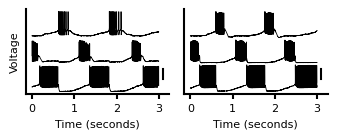

In [16]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    viz.compare_voltage_low_and_high_energy_trace(
        all_out_targets,
        t,
        get_time(),
        figsize=(3.9, 1.1),
        cols=['k','k','k'],
        offset=[160000, 35000]
    )
    plt.savefig(PANEL_C1, facecolor='None', transparent=True)
    plt.show()

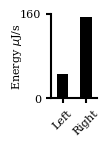

In [17]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1,1, figsize=(0.6, 1.1))
    ax.bar(np.arange(2), [46.0, 153.0], width=0.5, color='k')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim([-0.5, 1.5])
    ax.set_xticks([0,1])
    ax.set_yticks([0, 160])
    ax.set_ylim([0, 160])
    ax.set_ylabel("Energy $\mu$J/s", labelpad=-3)
    ax.set_xticklabels(['Left', "Right"], rotation=45)
    plt.savefig(PANEL_C2, facecolor='None', transparent=True)

Showing :   3.0 seconds
Scalebar indicates:  1000 micro Joule / second


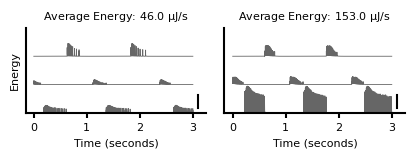

In [18]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    viz.compare_energy_low_and_high_energy_trace(
        all_out_targets,
        t,
        get_time(),
        figsize=(4.9, 1.1),
        cols=['k','k','k'],
        offset=[160000, 35000]
    )
#     plt.savefig(PANEL_C2, facecolor='None', transparent=True)
    plt.show()

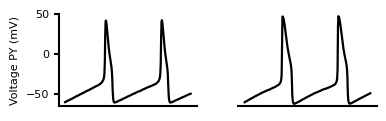

In [19]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    viz.energy_scape_voltage(
        all_out_targets,
        t,
        get_time(),
        figsize=(4.1, 1.2),
        cols=['k', 'k', 'k'],
        offset=[170000, 189090]
    )
    plt.savefig(PANEL_D1, facecolor="None", transparent=True)
    plt.show()

time_len 1600
ok
ok


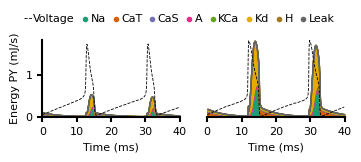

In [52]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    viz.energy_scape_energy_cosyne(
        all_out_targets,
        t,
        get_time(),
        figsize=(3.9, 1.0),
        cols=col,
        offset=[170000, 189090]
    )
    plt.savefig(PANEL_D2, facecolor="None", transparent=True)
    plt.show()

# Assemble figure

In [53]:
def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

In [54]:
from svgutils.compose import *

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise
factor_svg=5.5

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}
kwargs_consistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_consistent1 = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#9E7DD5'}
kwargs_inconsistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_text8pt = {'size': '7.7pt', 'font': 'Arial'}

f = Figure("12.1cm", "7.6cm",

    Panel(
          SVG('svg/panel_a_smaller.svg').scale(svg_scale).move(0*factor_svg,0*factor_svg),
          Text("a", 0.0*factor_svg, 2*factor_svg, **kwargs_text),
    ).move(2*factor_svg, 0.5*factor_svg),

    Panel(
          SVG(PANEL_C1).scale(svg_scale).move(0*factor_svg,0*factor_svg),
          Text("b", -3.0*factor_svg, 2*factor_svg, **kwargs_text),
    ).move(30*factor_svg, 0.5*factor_svg),

    Panel(
          SVG(PANEL_C2).scale(svg_scale).move(0*factor_svg,0*factor_svg),
          Text("c", 0.0*factor_svg, -1*factor_svg, **kwargs_text),
    ).move(2*factor_svg, 29.5*factor_svg),

   Panel(
          SVG(PANEL_D2).scale(svg_scale).move(0*factor_svg,0*factor_svg),
          Text("d", 0.0*factor_svg, 1*factor_svg, **kwargs_text),
    ).move(27.3*factor_svg, 26.5*factor_svg),

)

!mkdir -p fig
f.save("fig/fig1.svg")
svg('fig/fig1.svg')